## Coursework Part 2 - Dubai CW PG Thursday 6

Group Members 
* Aman
* Faizan
* Fardeen
* Pratibha
___

In [1]:
#import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#upload the complete dataset

X = pd.read_csv('../../dataset/CompleteDataSet/x_train_all.csv')
y = pd.read_csv('../../dataset/CompleteDataSet/y_train_all.csv')

In [3]:
X['class'] = y
data = X[(X['class'] == 1) | (X['class'] == 2)]

X = data.iloc[:, :-1]
y = data['class']

In [4]:
X.shape

(4470, 2304)

In [5]:
y.value_counts()

class
2    2250
1    2220
Name: count, dtype: int64

In [6]:
#normalising the data values so that all the values will be within 0 and 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]

array([0.69512195, 0.67479675, 0.69512195, ..., 0.54216867, 0.54618474,
       0.54618474])

In [7]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)

C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

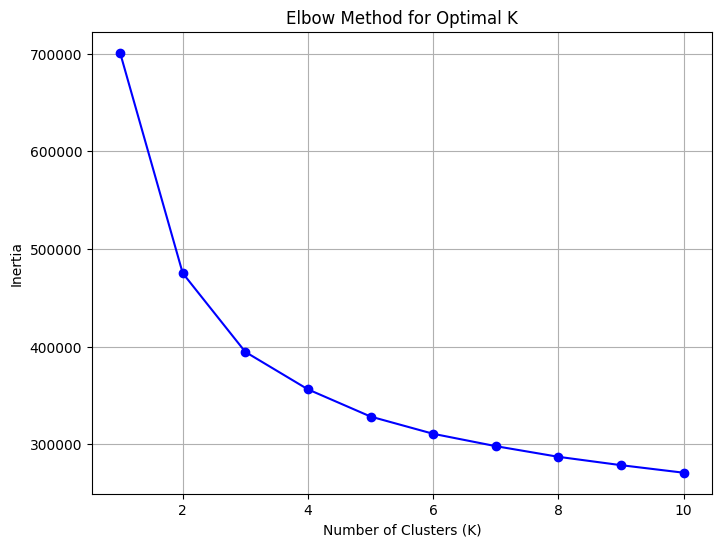

In [8]:
from sklearn.cluster import KMeans

# Define a range of K values
k_values = range(1, 11)  # You can adjust the range as needed

# Initialize an empty list to store the inertia values
inertia_values = []

# Perform K-Means clustering for each K and record the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

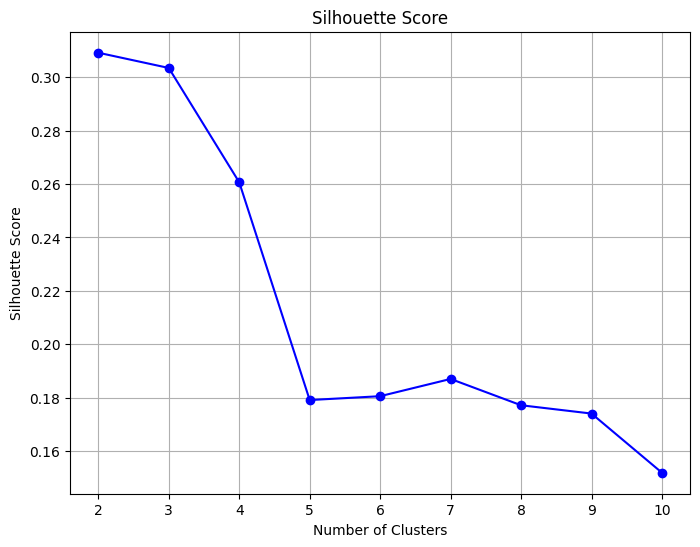

In [9]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average silhouette score for K=2: 0.3095345402807047


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average silhouette score for K=3: 0.3034371343330348


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average silhouette score for K=4: 0.2659768670527931


C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average silhouette score for K=5: 0.17914990872530154


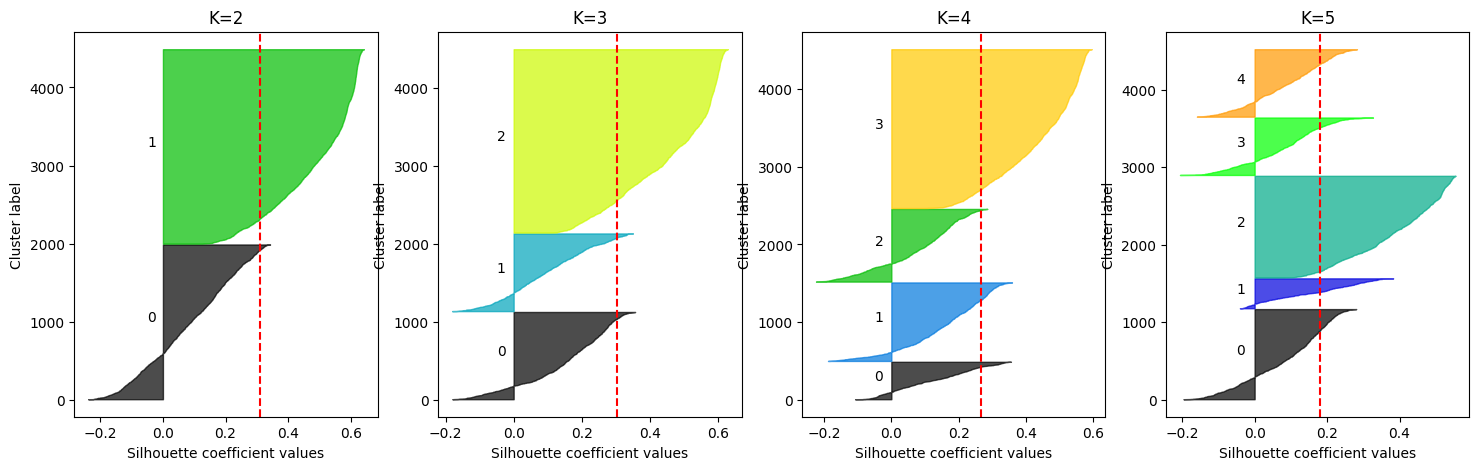

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define a range of K values
k_values = range(2, 6)  # Adjust the range as needed

# Create subplots
fig, axs = plt.subplots(1, len(k_values), figsize=(18, 5))

# Initialize variables to track the maximum silhouette score and the corresponding K value
max_silhouette_avg = -1
best_k = None

# Iterate over each K value and create silhouette plots
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X_pca)

    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    if silhouette_avg > max_silhouette_avg:
        max_silhouette_avg = silhouette_avg
        best_k = k

    print(f"Average silhouette score for K={k}: {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for cluster in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(cluster) / k)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_i, str(cluster))
        y_lower = y_upper + 10

    axs[i].set_title(f"K={k}")
    axs[i].set_xlabel("Silhouette coefficient values")
    axs[i].set_ylabel("Cluster label")

    # Add a dotted line for the average silhouette score
    axs[i].axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'K means Classifcation')

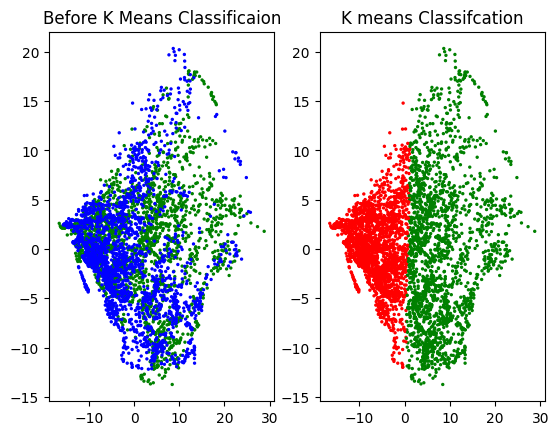

In [11]:
# Perform K-Means clustering and get cluster labels
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit_predict(X_pca)

colors = np.array(["Red","Green","Blue"])
plt.subplot(1,2,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1] ,c = colors[y], s=2)
plt.title("Before K Means Classificaion")

plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1] ,c = colors[kmeans.labels_], s=2)
plt.title("K means Classifcation")

### Using t-SNE to visualize the clusters

In [12]:
from sklearn.manifold import TSNE

# Initialize the t-SNE model and specify the number of components (e.g., 2 for 2D visualization)
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform your data
X_tsne = tsne.fit_transform(X_scaled)

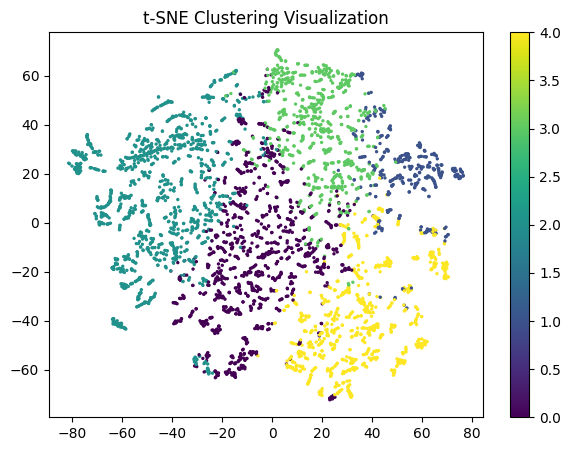

In [13]:
plt.figure(figsize=(7, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', s=2)
plt.colorbar()
plt.title('t-SNE Clustering Visualization')
plt.show()

C:\Users\aman.n\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


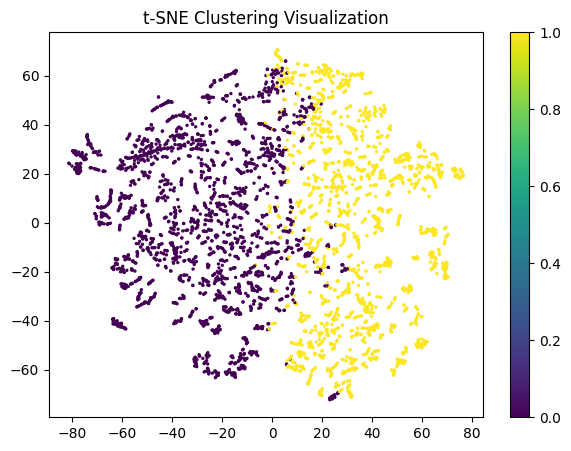

In [14]:
# Perform K-Means clustering and get cluster labels
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Visualize the data with t-SNE and color the data points by cluster labels
plt.figure(figsize=(7, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', s=2)
plt.colorbar()
plt.title('t-SNE Clustering Visualization')
plt.show()


### Using EM and GMM

In [15]:
from sklearn.mixture import GaussianMixture

# Define the number of clusters (you can experiment with different values)
num_clusters = 2

# Initialize and fit the EM model to your data
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
cluster_labels = gmm.fit_predict(X_pca)

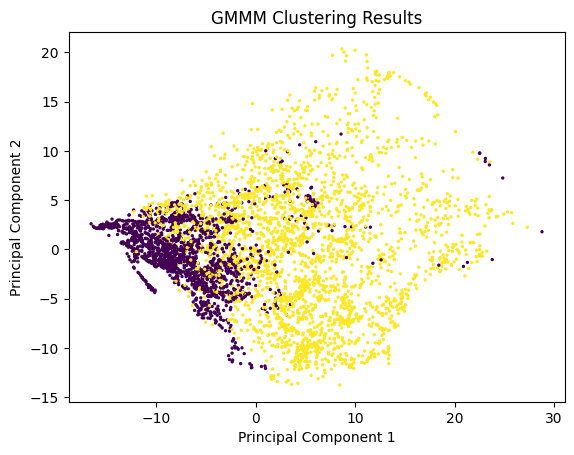

In [16]:
# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=2)
plt.title("GMMM Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [17]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_pca, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.1798220079173317


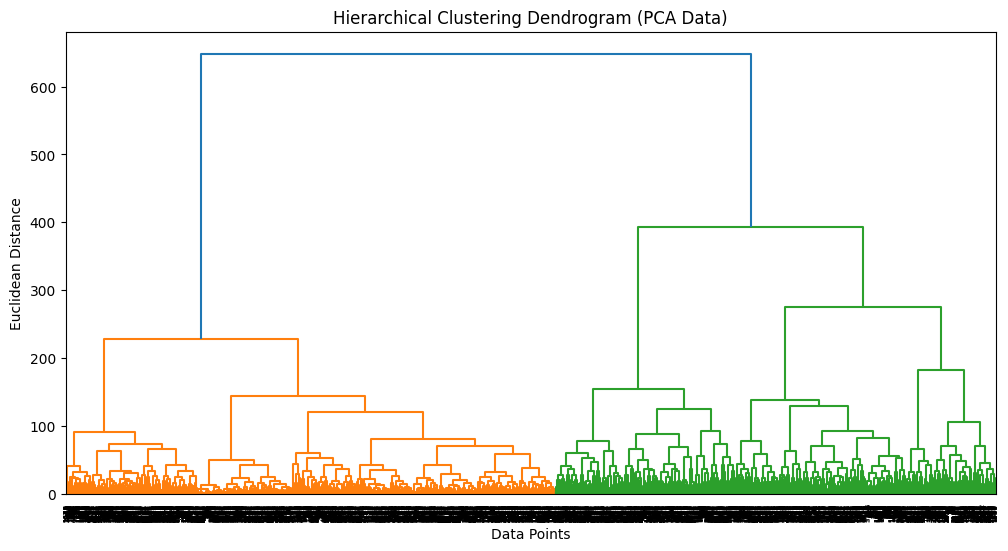

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Ensure the data type is float64
X_pca = X_pca.astype(np.float64)

# Calculate the linkage matrix
Z = linkage(X_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (PCA Data)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


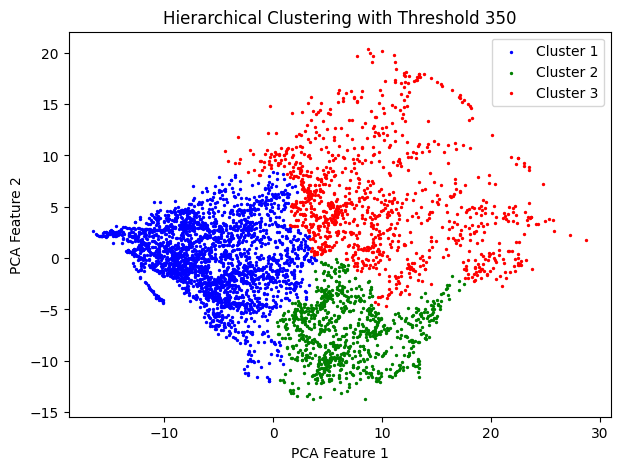

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Perform hierarchical clustering with the first two PCA components
Z = linkage(X_pca[:, :2], method='ward')

# Set the threshold to determine the number of clusters
threshold = 350  # Adjust this value based on your dendrogram

# Get cluster labels based on the threshold
clusters = fcluster(Z, t=threshold, criterion='distance')

# Create a DataFrame with PCA features and cluster labels
X_pca_with_clusters = pd.DataFrame(X_pca, columns=[f'PCA{i}' for i in range(1, X_pca.shape[1] + 1)])
X_pca_with_clusters['Cluster'] = clusters

# Visualize the clustered data
plt.figure(figsize=(7, 5))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Define colors for clusters
for cluster_id in np.unique(clusters):
    cluster_data = X_pca_with_clusters[X_pca_with_clusters['Cluster'] == cluster_id]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], c=colors[cluster_id - 1], label=f'Cluster {cluster_id}', s=2)

plt.title(f'Hierarchical Clustering with Threshold {threshold}')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()
